In [7]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [22]:
''' 
Script: meanWRF_rr_wspd_boxplot.ipynb
Author: L Grimley
Last Updated: 8/20/24

Description: 
    This script generates a boxplot and stats on the mean rain rate and wind speed
    using present/future ensemble simulations for three hurricanes: Florence, Matthew, and Floyd

Inputs:
    - CSV with empirical distribution of rain rates/wind speeds generated using XXXXXX
    - Output directory

Outputs:
    - Boxplot of the mean rain rates/wind speeds for the three storms across the 2 climates
    - A tabular form of the boxplot information as a CSV
'''

' \nScript: meanWRF_rr_wspd_boxplot.ipynb\nAuthor: L Grimley\nLast Updated: 8/20/24\n\nDescription: \n    This script generates a boxplot and stats on the mean rain rate and wind speed\n    using present/future ensemble simulations for three hurricanes: Florence, Matthew, and Floyd\n\nInputs:\n    - CSV with empirical distribution of rain rates/wind speeds generated using XXXXXX\n    - Output directory\n\nOutputs:\n    - Boxplot of the mean rain rates/wind speeds for the three storms across the 2 climates\n    - A tabular form of the boxplot information as a CSV\n'

In [23]:
# Update to the location where you want to save the output
os.chdir(r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\sfincs\03_OBS\analysis')
storms = ['flor', 'floy', 'matt']

In [24]:
''' RAIN RATE'''
# Load CSV with scale factors
rr = pd.read_csv(r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\wrf_analysis\scale_factors\scale_factors_wrfGrid'
                 r'\precip_thresh_5_to_100\precip_thresh_5_to_100_data.csv', header=0)
print(rr.head(3))

                  run_id     count       mean       std       min        1%  \
0  floyd_present_ensmean  712758.0  10.938537  6.023396  5.000007  5.052559   
1     floyd_present_ens1  670421.0  13.327785  9.541531  5.000003  5.068840   
2     floyd_present_ens2  676992.0  13.620214  9.688345  5.000008  5.069209   

        10%       25%        50%        75%        90%        99%        max  \
0  5.566788  6.612163   9.093363  13.285610  18.657572  33.321644  81.699219   
1  5.738903  7.087963  10.223854  15.964149  24.573181  51.272519  99.980255   
2  5.732964  7.085787  10.423792  16.594112  25.586678  51.019214  99.973953   

   loc      scale      popt        pcov  climate  storm      run  
0  0.0  10.938537  0.190046  109.544236  present  floyd  ensmean  
1  0.0  13.327785  0.189993  108.756581  present  floyd     ens1  
2  0.0  13.620214  0.189943  109.343391  present  floyd     ens2  


In [25]:
# Get the rain rates for the future climate runs, remove the ensemble mean
rr_fut = rr[rr['climate'] == 'future']
rr_fut_ensmean = rr_fut[rr_fut['run'] == 'ensmean']
rr_fut_members = rr_fut[rr_fut['run'] != 'ensmean']

# Get the rain rates for the present climate runs, remove the ensemble mean
rr_pres = rr[rr['climate'] == 'present']
rr_pres_ensmean = rr_pres[rr_pres['run'] == 'ensmean']
rr_pres_members = rr_pres[rr_pres['run'] != 'ensmean']

# Combine present and future member rain rates into a single dataframe
combined = pd.concat([rr_pres_members, rr_fut_members], axis=0, ignore_index=True)
combined.set_index(['run_id'], inplace=True)

In [26]:
# Calculate std of the mean
stats = pd.DataFrame()
for storm in ['florence', 'floyd', 'matthew']:
    stats_list = [f'{storm}']
    # Select all the model runs based on the STORM and the CLIMATE
    # Present data
    runs1 = [x for x in combined.index if storm in x and 'present' in x]
    d1 = combined[combined.index.isin(runs1)]

    # Future data
    runs2 = [x for x in combined.index if storm in x and 'future' in x]
    d2 = combined[combined.index.isin(runs2)]

    for s in ['mean', '50%', '90%']:
        # Future minus Present
        diff = d2[s].values - d1[s].values
        # Get the standard deviation of the mean
        std = np.std(diff)
        stats_list.append(diff.mean())
        stats_list.append(std)
        
    stats_df = pd.DataFrame(stats_list).T
    stats_df.columns = ['event', 'mean', 'mean_std', '50%', '50%_std', '90%', '90%_std']
    stats = pd.concat([stats, stats_df], axis=0)

stats.set_index('event', inplace=True, drop=True)
stats = stats.astype(float).round(2)

print(stats)

          mean  mean_std   50%  50%_std    90%  90%_std
event                                                  
florence  4.25      1.24  2.16     1.02  11.92     2.69
floyd     2.48      0.25  1.66     0.10   5.67     0.68
matthew   3.07      0.33  1.51     0.42   8.61     1.03


In [48]:
''' WIND SPEED '''
ws = pd.read_csv(r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\wrf_analysis\scale_factors\scale_factors_wrfGrid_landMask\wind_spd_thresh_15_to_100\wind_spd_thresh_15_to_100_data.csv',
                 header=0)
print(ws.head(3))

ws_fut = ws[ws['climate'] == 'future']
ws_fut_ensmean = ws_fut[ws_fut['run'] == 'ensmean']
ws_fut_members = ws_fut[ws_fut['run'] != 'ensmean']
ws_pres = ws[ws['climate'] == 'present']
ws_pres_ensmean = ws_pres[ws_pres['run'] == 'ensmean']
ws_pres_members = ws_pres[ws_pres['run'] != 'ensmean']
combined = pd.concat([ws_pres_members, ws_fut_members], axis=0, ignore_index=True)
combined.set_index(['run_id'], inplace=True)

                  run_id      count       mean       std        min  \
0  floyd_present_ensmean  3432482.0  21.537952  5.401659  15.000001   
1     floyd_present_ens1  3457039.0  21.750540  5.666109  15.000001   
2     floyd_present_ens2  3560371.0  21.731638  5.541777  15.000001   

          1%        10%        25%        50%        75%        90%  \
0  15.075633  15.803989  17.218783  20.206897  24.573913  29.282039   
1  15.077115  15.801504  17.236392  20.297234  24.886082  29.827776   
2  15.080561  15.847413  17.293982  20.374514  24.877757  29.636404   

         99%        max  climate  storm      run  
0  37.682971  49.487656  present  floyd  ensmean  
1  38.995097  55.066498  present  floyd     ens1  
2  38.607940  54.751751  present  floyd     ens2  


In [49]:
# Calculate std of the mean
stats = pd.DataFrame()
for storm in ['florence', 'floyd', 'matthew']:
    stats_list = [f'{storm}']

    runs1 = [x for x in combined.index if storm in x and 'present' in x]
    d1 = combined[combined.index.isin(runs1)]

    runs2 = [x for x in combined.index if storm in x and 'future' in x]
    d2 = combined[combined.index.isin(runs2)]

    for s in ['mean', '50%', '90%']:
        diff = d2[s].values - d1[s].values
        std = np.std(diff)
        stats_list.append(diff.mean())
        stats_list.append(std)
    stats_df = pd.DataFrame(stats_list).T
    stats_df.columns = ['event', 'mean', 'mean_std', '50%', '50%_std', '90%', '90%_std']
    stats = pd.concat([stats, stats_df], axis=0)
stats.set_index('event', inplace=True, drop=True)
stats = stats.astype(float).round(2)

print(stats)

          mean  mean_std   50%  50%_std   90%  90%_std
event                                                 
florence -0.14      0.33 -0.31     0.33 -0.35     0.62
floyd     0.38      0.12 -0.07     0.15  1.29     0.20
matthew   0.36      0.35  0.24     0.38  0.67     0.53


In [50]:
''' PLOT '''
# Organize the data for plotting 
ds_plot = [rr_pres_members[['mean', 'storm']],
           rr_fut_members[['mean', 'storm']],
           ws_pres_members[['mean', 'storm']],
           ws_fut_members[['mean', 'storm']]]
# Plot subplots
nrow = 2
ncol = 2

In [51]:
# Plot format
font = {'family': 'Arial', 'size': 10}
mpl.rc('font', **font)
mpl.rcParams.update({'axes.titlesize': 10})
mpl.rcParams["figure.autolayout"] = True
props = dict(boxes="white", whiskers="black", caps="black")
boxprops = dict(facecolor='white', linestyle='--', linewidth=1, color='black')
flierprops = dict(marker='o', markerfacecolor='none', markersize=6, markeredgecolor='black')
medianprops = dict(linestyle='-', linewidth=2, color='black')
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='lightgrey', markersize=6)
n_subplots = nrow * ncol
first_in_row = np.arange(0, n_subplots, ncol)
last_in_row = np.arange(ncol - 1, n_subplots, ncol)
first_row = np.arange(0, ncol)
last_row = np.arange(first_in_row[-1], n_subplots, 1)

Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\sfincs\03_OBS\analysis


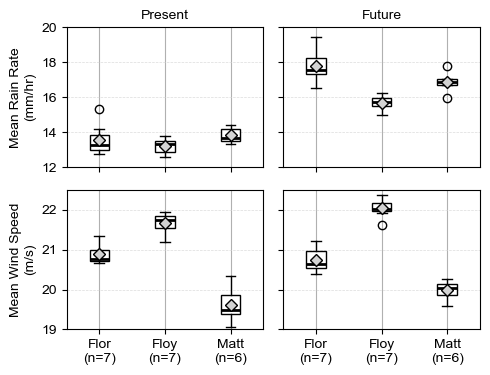

In [55]:
# PLOTTING Boxplot of flooded area
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, tight_layout=True, figsize=(5, 4))
axes = axes.flatten()
for ii in range(len(ds_plot)):
    ax = axes[ii]
    bp = ds_plot[ii].boxplot(ax=ax, by='storm',
                             vert=True, color=props, boxprops=boxprops, flierprops=flierprops,
                             medianprops=medianprops, meanprops=meanpointprops, meanline=False,
                             showmeans=True, patch_artist=True, zorder=1)
    ax.set_xlabel(None)
    ax.set_title('')
    if ii in first_row:
        ax.set_ylabel('Mean Rain Rate\n(mm/hr)')
        ax.set_ylim(12, 20)
        ax.xaxis.set_tick_params(labelbottom=False)
    if ii in last_row:
        ax.set_ylabel('Mean Wind Speed\n(m/s)')
        xtick = ax.get_xticks()
        ax.set_xticklabels(['Flor\n(n=7)', 'Floy\n(n=7)', 'Matt\n(n=6)'])
        #ax.set_ylim(8, 15)
        #ax.set_ylim(13.5, 18)
        ax.set_ylim(19, 22.5)
    if ii in last_in_row:
        ax.set_ylabel('')
        ax.yaxis.set_tick_params(labelbottom=False, labelleft=False)

axes[0].set_title('Present')
axes[1].set_title('Future')

for ax in axes:
    ax.set_xlabel('')
    kwargs = dict(linestyle='--', linewidth=0.5, color='lightgrey', alpha=0.8)
    ax.grid(visible=True, which='major', axis='y', zorder=0, **kwargs)
    kwargs = dict(linestyle='--', linewidth=0.5, color='lightgrey', alpha=0.8)
    ax.grid(visible=True, which='minor', axis='y', zorder=0, **kwargs)
    ax.set_axisbelow(True)

plt.suptitle(None)
plt.subplots_adjust(wspace=0, hspace=0)
plt.margins(x=0, y=0)
plt.savefig(r'future_TC_vars_boxplot_WRF_domain_15ms.png', bbox_inches='tight', dpi=255)
#plt.close()
print(os.getcwd())

In [23]:
var_stats = pd.DataFrame()
tracker = []
event_id = ['pres_rr', 'fut_rr', 'pres_ws', 'fut_ws']
counter = 0
# Loop through the boxplots and get specific stats for each variable
for ds in ds_plot:
    tracker.append(event_id[counter])
    df = ds.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95]).T
    var_stats = pd.concat([var_stats, df], ignore_index=False)
    for storm in ds.storm.unique():
        ds2 = ds[ds['storm'] == storm]
        df = ds2.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95]).T
        var_stats = pd.concat([var_stats, df], ignore_index=False)
        tracker.append(f'{event_id[counter]}_{storm}')
    counter += 1
var_stats.index = tracker
print(var_stats.head(4))
var_stats.to_csv('wrf_var_stats_WRF_GRID.csv')
print(os.getcwd())

                  count       mean       std        min         5%        25%  \
pres_rr            20.0  13.514331  0.667921  12.570984  12.730122  13.031757   
pres_rr_floyd       7.0  13.208712  0.452659  12.570984  12.624688  12.867481   
pres_rr_matthew     6.0  13.813392  0.460651  13.341260  13.373168  13.497281   
pres_rr_florence    7.0  13.563613  0.910898  12.738498  12.786772  12.973384   

                        50%        75%        95%        max  
pres_rr           13.444716  13.736011  14.480908  15.333085  
pres_rr_floyd     13.327785  13.520377  13.736614  13.786499  
pres_rr_matthew   13.650815  14.179179  14.410171  14.436057  
pres_rr_florence  13.267120  13.829910  14.983679  15.333085  
Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\sfincs\03_OBS\analysis
